1.# import libraries 

In [1]:
#Zomato Mumbai Data Analysis Project

In [2]:
import pandas as pd
import numpy as p
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default ="svg"

#Scalable Vector Graphics(SVG) --> default renderer for Plotly Express visualizations to "svg". 
#Plotly Express is a high-level library for data visualization in Python

2.# Loading the Dataset

In [3]:
dataset=pd.read_csv("Zomato_Mumbai_Dataset_Splitnew.csv")

In [4]:
dataset.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200.0,Modern Indian\tNorth Indian\tChinese\tMomos\tB...,Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400.0,Desserts\tIce Cream\tBeverages,Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800.0,Asian\tChinese,Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000.0,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200.0,North Indian\tChinese\tContinental,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),VeÄ¾mi dobrÃ©,4.4,5995


3.# Getting the basic information

In [5]:
dataset.shape

(15081, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             15081 non-null  object 
 1   PRICE            15080 non-null  float64
 2   CUSINE_CATEGORY  15079 non-null  object 
 3   CITY             15080 non-null  object 
 4   REGION           15080 non-null  object 
 5   URL              15080 non-null  object 
 6   PAGE NO          15080 non-null  object 
 7   CUSINE TYPE      15080 non-null  object 
 8   TIMING           15015 non-null  object 
 9   RATING_TYPE      15080 non-null  object 
 10  RATING           15080 non-null  object 
 11  VOTES            15080 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.4+ MB


In [7]:
dataset.describe()

,PRICE
count,15080.000000
mean,450.877785
std,308.269166
min,0.000000
25%,300.000000
50%,400.000000
75%,550.000000
max,5000.000000


# 4.#Cleaning the Dataset


# 4A.Removing the Redundunt rows of data



# checking the redundant rows



In [8]:
duplicate_data=dataset['PAGE NO']=='PAGE NO'


In [9]:
dataset[duplicate_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,0.0,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [10]:
# This will permamnently remove the wrong

dataset=dataset[~duplicate_data]

In [11]:
#Dropping the columns which are not required for further analysis
dataset.drop(['URL','PAGE NO','CITY'],axis=1,inplace=True)

#B.Removing the Null Values
#checking the null values in column

In [12]:
dataset.isnull().sum()

NAME                0
PRICE               1
CUSINE_CATEGORY     2
REGION              1
CUSINE TYPE         1
TIMING             66
RATING_TYPE         1
RATING              1
VOTES               1
dtype: int64


#checking the null values in row


In [13]:
dataset[dataset['CUSINE_CATEGORY'].isnull()]



,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
7338,Mother's Taste,400.0,NaN,Bhandup,none,11am to 11pm(Mon-Sun),Good,3.5,57
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Dropping the  above row from the dataset
dataset=dataset.drop(index=15080,axis=0)

In [15]:
#REPLACING THE OTHER NULL RECORDS WITH NA(Not Applicable)
dataset.fillna('NA',inplace=True)

In [16]:

# confriming all the null records are correct

dataset.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

#4c.CONVERTING THE DATATYPES OF NUMERICAL COLUMNS TO NUMERICAL DATATYPES

In [17]:
dataset['VOTES'].value_counts()

-       2360
NEW      953
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: VOTES, Length: 1123, dtype: int64

In [18]:
dataset['VOTES'].replace(to_replace=['-','NEW','Opening','VOTES'],value='0',inplace=True)


In [19]:
dataset['VOTES'].value_counts()

0       3371
4        364
5        320
6        288
7        277
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: VOTES, Length: 1120, dtype: int64

In [20]:
dataset['RATING'].value_counts()

-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3           622
3.9         596
2.9         409
4           408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2             1
Name: RATING, dtype: int64

In [21]:
dataset['RATING'].replace(to_replace=['-','NEW','Opening'],value='0',inplace=True)

In [22]:
dataset['RATING'].value_counts()

0      3370
3.5    1094
3.4    1036
3.6     960
3.3     926
3.7     917
3.2     801
3.8     782
3.1     734
3       622
3.9     596
2.9     409
4       408
2.8     309
4.1     298
4.2     199
2.7     170
4.3     148
4.4      99
2.6      77
4.5      46
2.5      39
4.6      32
2.4      26
4.7      13
2.3      10
2.1       5
2.2       4
4.8       4
4.9       2
1.8       1
2         1
Name: RATING, dtype: int64

In [23]:
# Changing the Datatype
dataset.dtypes

NAME                object
PRICE              float64
CUSINE_CATEGORY     object
REGION              object
CUSINE TYPE         object
TIMING              object
RATING_TYPE         object
RATING              object
VOTES               object
dtype: object

In [24]:
#Changing datatype into Numerical Columns.
dataset['PRICE']=dataset['PRICE'].astype('int64')
dataset['RATING']=dataset['RATING'].astype('float64')
dataset['VOTES']=dataset['VOTES'].astype('int64')

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


In [26]:
#D.WORKING WITH TIMING COLUMN

In [27]:
dataset['TIMING'].value_counts()

11am to 11pm(Mon-Sun)                               1192
11am to 12midnight(Mon-Sun)                          632
12noon to 12midnight(Mon-Sun)                        467
11am to 1130pm(Mon-Sun)                              309
10am to 10pm(Mon-Sun)                                267
                                                    ... 
1130am to 4pm\t630pm to 1230AM...                      1
12midnight to 5am\t12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM\t12noon to 4pm\t7pm to ...        1
12noon to 330pm\t630pm to 12midnight...                1
8am to 11pm\t12midnight to 115am(Mon-Sun)              1
Name: TIMING, Length: 2551, dtype: int64

In [28]:
#Split and store it in Temp Data Frame.
temp_data=dataset['TIMING'].str.split("(",n=1,expand=True)

temp_data

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,8am to 11pm\t12midnight to 115am,Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,Mon\tTue\tWed\tThu\tSun)\t11am to ...
15078,9am to 1230AM,Mon-Sun)


In [29]:
temp_data

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,8am to 11pm\t12midnight to 115am,Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,Mon\tTue\tWed\tThu\tSun)\t11am to ...
15078,9am to 1230AM,Mon-Sun)


In [30]:
#Assigning the columns back to the dataset dataframe
dataset["TIMING"]=temp_data[0]
dataset["DAYS_OPEN"]=temp_data[1]
dataset.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,Modern Indian\tNorth Indian\tChinese\tMomos\tB...,First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,Desserts\tIce Cream\tBeverages,Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,Asian\tChinese,Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,North Indian\tChinese\tContinental,Bandra Kurla Complex,Bar,1130am to 1am,VeÄ¾mi dobrÃ©,4.4,5995,Mon-Sun)


In [31]:
# Removing the bracket charcter from Days column regex (Regular Expression)
dataset["DAYS_OPEN"]=dataset["DAYS_OPEN"].str.replace(')','',regex=True)

In [32]:
# Checking the Null Records in DAYS_OPEN column
dataset.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [33]:
# Replacing the Null Values with NA
dataset.fillna('NA',inplace=True)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


In [35]:
#E. REMOVING THE RESTAURANT RECORDS WHOSE RATING OR VOTE IS 0
#Finding those restaurant whose has 0 rating or Votes
useless_data=(dataset['RATING']==0.0)|(dataset['VOTES']==0)
dataset[useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,Maharashtrian\tMughlai\tChinese,Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,Biryani\tNorth Indian,Near Andheri East Station,none,11am to 3am,None,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,12noon to 330pm\t7pm to 3am,None,0.0,0,Mon-Sun
39,Nation Tadka,400,North Indian\tSouth Indian\tChinese\tFast Food,Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,North Indian\tChinese,Jogeshwari,Quick Bites,12noon to 4pm\t8pm to 1am,Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,None,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,None,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,Cafe\tHealthy Food\tItalian\tPizza\tBeverages,Linking Road-- Bandra West,CafÃ©,10am to 10pm,None,0.0,0,Mon-Thu\t10am to 11pm(Fri-Sun
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,None,0.0,0,Mon-Sun


In [36]:
#This Removes the Rating which has 0 perm
dataset=dataset[~useless_data]

In [37]:
#F.WORKING ON RATING_TYPE COLUMN

In [38]:
dataset['RATING_TYPE'].value_counts() 

Average           5111
Good              4330
Very Good         1137
Excellent           95
Poor                47
VeÄ¾mi dobrÃ©        6
SkvÄ›lÃ¡ volba       4
Dobrze               4
Bardzo dobrze        3
Ortalama             2
Bueno                2
Ä°yi                 2
Buono                2
DobrÃ©               2
Bom                  2
Priemer              2
PrÅ¯mÄ›r             2
Muito Bom            2
Promedio             2
Muy Bueno            1
Sangat Baik          1
MÃ©dia               1
Biasa                1
SkvÄ›lÃ©             1
Baik                 1
Ã‡ok iyi             1
Excelente            1
Velmi dobrÃ©         1
Media                1
Name: RATING_TYPE, dtype: int64

In [39]:
# Translating the texts into proper text
dataset['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré','VeÄ¾mi dobrÃ©','Velmi dobrÃ©'],value='Very Good',inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Skvělá volba','SkvÄ›lÃ¡ volba','SkvÄ›lÃ©','Dobrze','Bueno','Buono','Dobré','DobrÃ©','Bom','Skvělé'],value='Good',inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi','Ã‡ok iyi','Ä°yi'],value='Average', inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Průměr','PrÅ¯mÄ›r','Promedio','Ortalama','Muito Bom','İyi'],value='Poor', inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','MÃ©dia','Sangat Baik'],value='Very Poor', inplace=True)

In [40]:
# Checking all the updated values correctly mapped

dataset['RATING_TYPE'].value_counts()

Average      5116
Good         4347
Very Good    1148
Excellent      96
Poor           55
Very Poor       5
Name: RATING_TYPE, dtype: int64

In [41]:
#G.WORKING WITH REGION COLUMN

In [42]:

dataset['REGION'].value_counts()

Mira Road                            404
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
The Lalit Mumbai-- Chakala             1
Holiday Inn-- Sakinaka                 1
Italian\tMexican                       1
Hotel Royal Inn-- Khar                 1
Hotel Satkar Residency-- Majiwada      1
Name: REGION, Length: 238, dtype: int64

In [43]:
# Removing the irrevalant text from the region

dataset['REGION']=dataset['REGION'].str.replace('[a-zA-z].+--','',regex=True)

In [44]:
dataset['REGION']

0         Bandra Kurla Complex
1                        Mahim
2                         Juhu
3         Bandra Kurla Complex
4         Bandra Kurla Complex
                 ...          
15075             Andheri West
15076           Kandivali West
15077              Lower Parel
15078           Kandivali West
15079               Malad West
Name: REGION, Length: 10767, dtype: object

In [45]:
# Removing the west & East from the Region column

In [46]:
dataset['REGION']=dataset['REGION'].str.replace('West|west|East|east','',regex=True)

In [47]:
# Replacing small regions with known region name
dataset['REGION'] = dataset['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Andheri',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Runwal Green','Mulund',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Kamothe','Sion',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

h. Removing Duplicate records

In [48]:
#Finding all the duplicate rows
dataset[dataset.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,North Indian\tKonkan,Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,Seafood\tMaharashtrian\tMalwani,Mahakali,Quick Bites,11am to 330pm\t630pm to 1130pm,Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,Seafood\tMalwani,Chakala,Casual Dining,12noon to 3pm\t730pm to 1030pm,Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,Chinese\tMughlai,Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,Chinese\tNorth Indian\tSeafood\tMughlai,Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,Italian\tNorth Indian\tChinese,Malad,Casual Dining,12noon to 3pm\t7pm to 1230AM,Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,Ice Cream\tDesserts\tFast Food,Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [49]:
# Dropping all the Duplicates

dataset=dataset.drop_duplicates()

In [50]:

# Copying the cleaned data into new DataFrame

In [51]:
zomato_mumbai=dataset.copy()

In [52]:
zomato_mumbai

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,Modern Indian\tNorth Indian\tChinese\tMomos\tB...,Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,Desserts\tIce Cream\tBeverages,Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,Asian\tChinese,Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,North Indian\tChinese\tContinental,Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,Chinese\tFast Food\tNorth Indian,Andheri,Casual Dining,8am to 11pm\t12midnight to 115am,Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,Fast Food\tSouth Indian\tChinese,Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,Fast Food\tLebanese,Lower Parel,none,11am to 11pm,Average,3.4,99,Mon\tTue\tWed\tThu\tSun\t11am to ...
15078,Uncha Otlawala,300,Desserts\tIce Cream,Kandivali,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


5.Performing exploratory DataAnalysis

Q1.How Many Restaurats are in Mumbai  for each type of cusine?

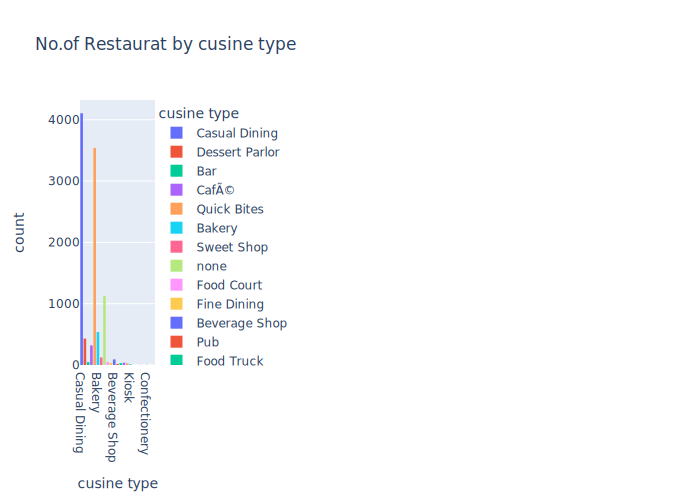

In [68]:
fig=px.histogram(zomato_mumbai, x='CUSINE TYPE', color='CUSINE TYPE',
                 title='No.of Restaurat by cusine type',
                 labels={'CUSINE TYPE':'cusine type'})

fig.show()

Q2.What are the percetange of restaurants by rating type in mumbai?

In [59]:
rating_type=zomato_mumbai['RATING_TYPE'].value_counts().reset_index()
rating_type.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)

In [60]:
rating_type

,RATING TYPE,COUNT OF RESTAURANTS
0,Average,4984
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,54
5,Very Poor,5


In [56]:
rating_type.rename(columns={'index':'Rating Type','Rating_Type':'Count of restuarant'},inplace=True)

In [57]:
rating_type

,Rating Type,RATING_TYPE
0,Average,4984
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,54
5,Very Poor,5


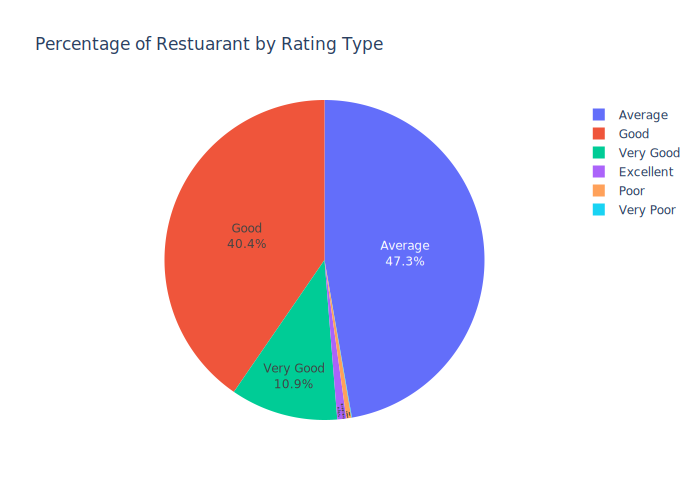

In [61]:
fig = px.pie(rating_type, names='RATING TYPE', values='COUNT OF RESTAURANTS', color='RATING TYPE',
           title='Percentage of Restuarant by Rating Type').update_traces(textposition='inside',
           textinfo='percent+label')
fig.show()

Q3.Which is the Top 10 Highest rated seafood Restaurant in Mumbai?

In [62]:
seafood_df = zomato_mumbai[zomato_mumbai['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,Seafood\tSouth Indian\tMangalorean\tAndhra\tKe...,Khar,Bar,12noon to 4pm\t7pm to 3am,Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,Seafood\tMaharashtrian\tNorth Indian\tChinese,Thane,Casual Dining,1130am to 1130pm,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,Maharashtrian\tMalwani\tKonkan\tSeafood,Kharghar,Casual Dining,11am to 345pm\t7pm to 1145pm,Excellent,4.6,209,Mon-Sun
12433,Quarter Canteen,1100,North Indian\tSeafood\tChinese,Bandra,Casual Dining,12noon to 330pm\t7pm to 1am,Excellent,4.5,573,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,Seafood\tBeverages,Bandra,Casual Dining,12noon to 1am,Excellent,4.5,100,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,Maharashtrian\tKonkan\tSeafood,Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
3380,Peco Peco,700,Chinese\tSeafood\tAsian,Powai,none,12noon to 330pm\t7pm to 1230AM,Excellent,4.5,497,Mon-Sun
9954,Pi Bar and Kitchen,1600,Continental\tEuropean\tItalian\tSeafood\tPizza...,Andheri,Bar,12noon to 6pm\t7pm to 12midnight,Excellent,4.5,2068,Mon-Sun
903,Ferry Wharf,1500,Seafood\tMangalorean,Bandra,Casual Dining,11am to 330pm\t7pm to 1230AM,Very Good,4.4,459,Mon-Sun
915,Monis Bar and Restaurant,1000,North Indian\tChinese\tContinental\tSeafood\tB...,Thane,Casual Dining,1130am to 330pm\t6pm to 1130pm,Very Good,4.4,662,Mon-Sun


Q4.Which is the Best Food Truck in Mumbai?

In [63]:
foodtruck_df = zomato_mumbai[zomato_mumbai['CUSINE TYPE']=='Food Truck']
foodtruck_df.sort_values(by="RATING",ascending=False).head(2)


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,Fast Food\tChinese,Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun


In [ ]:
Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?

In [64]:
# Assuming restaurants having rating above 4.5
highest_rated = zomato_mumbai[zomato_mumbai['RATING'] >= 4.5]
highest_rated

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,Modern Indian\tNorth Indian\tChinese\tMomos\tB...,Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,Biryani\tNorth Indian\tChinese\tMughlai,Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,North Indian\tChinese\tThai\tEuropean,Dadar,Bar,12noon to 1am,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,North Indian\tContinental\tChinese\tDesserts,Borivali,Casual Dining,11am to 330pm\t7pm to 1130pm,Excellent,4.5,1302,Mon\tTue\tWed...
14234,Cone Culture,250,European,Kharghar,Casual Dining,Closed,Excellent,4.6,492,Mon\t12noon to 11pm(Tue-Sun
15007,Dessertino,300,Desserts\tIce Cream,Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,North Indian\tItalian\tChinese\tMexican\tLebanese,Mulund,Casual Dining,1130am to 330pm\t7pm to 1130pm,Excellent,4.5,754,Mon-Sun


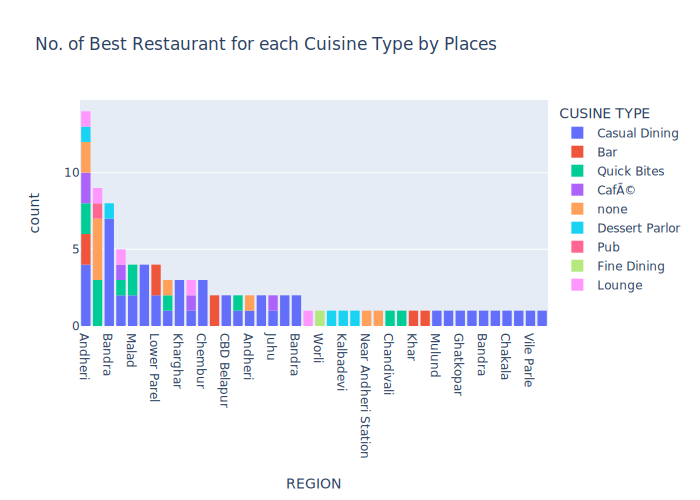

In [67]:
fig = px.histogram(highest_rated, x='REGION', color='CUSINE TYPE',
             title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?

In [69]:
highest_rated_price = highest_rated.groupby(by=['REGION', 'CUSINE TYPE'])['PRICE'].mean().reset_index()
highest_rated_price.head()

,REGION,CUSINE TYPE,PRICE
0,Andheri,Casual Dining,1000.0
1,Andheri,Bar,1600.0
2,Andheri,CafÃ©,800.0
3,Andheri,Casual Dining,1212.5
4,Andheri,Dessert Parlor,300.0


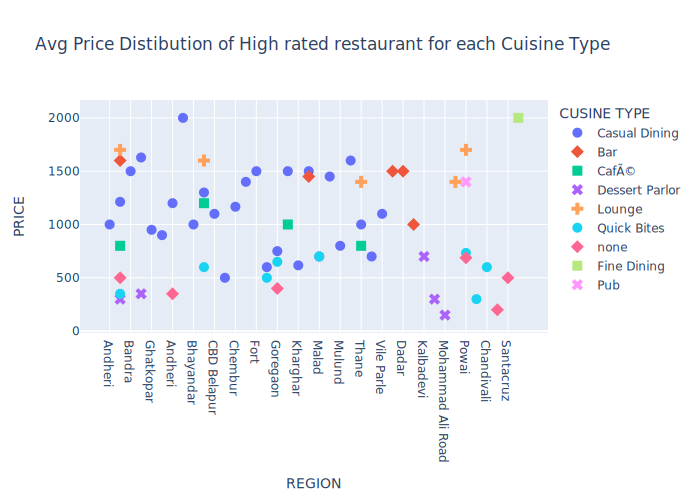

In [70]:
fig = px.scatter(highest_rated_price, x="REGION", y="PRICE", color="CUSINE TYPE", symbol="CUSINE TYPE",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

In [ ]:
Q7) Which areas have a large number of Chinese Restaurant Market?

In [71]:
chinese = zomato_mumbai[zomato_mumbai['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,Modern Indian\tNorth Indian\tChinese\tMomos\tB...,Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
2,Chin Chin Chu,1800,Asian\tChinese,Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
4,BKC DIVE,1200,North Indian\tChinese\tContinental,Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
5,Flea Bazaar CafÃ©,800,American\tAsian\tStreet Food\tNorth Indian\tLu...,Flea Bazaar CafÃ©,CafÃ©,12noon to 1am,Very Good,4.2,2042,Mon-Sun
6,Persian Darbar,1300,Biryani\tNorth Indian\tChinese\tMughlai,Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,North Indian\tChinese,Kurla,Quick Bites,12noon to 2am,Average,2.6,36,Mon-Sun
15072,Zuha's Kitchen,400,Chinese\tNorth Indian\tMughlai,Mumbai Central,Quick Bites,12noon to 4pm\t730pm to 430am,Average,3.3,13,Mon-Sun
15075,Tirupati Balaji,500,Chinese\tFast Food\tNorth Indian,Andheri,Casual Dining,8am to 11pm\t12midnight to 115am,Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,Fast Food\tSouth Indian\tChinese,Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun


In [106]:
chinese_rest = chinese.groupby(by='REGION').agg({'NAME' : 'count', 'PRICE' : 'mean'}).rename(columns= {'REGION':'REGION','NAME':'COUNT OF RESTAURANTS','PRICE_x':'PRICE'}).reset_index()
chinese_rest = chinese_rest.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest.head()

,REGION,COUNT OF RESTAURANTS,PRICE
36,Thane,341,589.017595
96,Mira Road,220,545.681818
90,Malad,185,599.189189
72,Goregaon,160,540.937500
65,Dombivali,158,539.259494


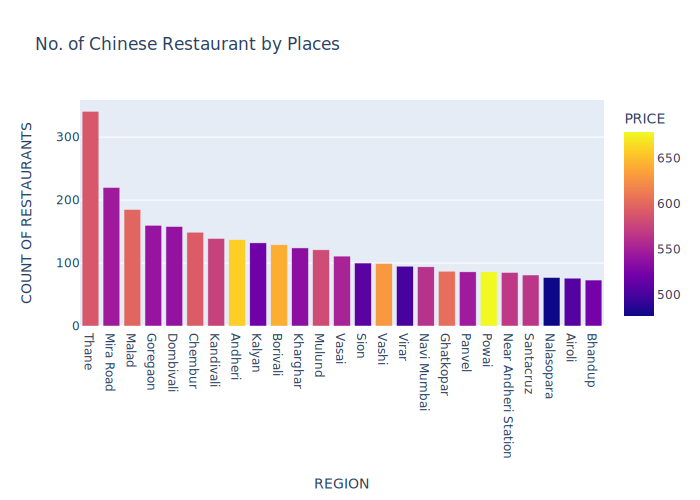

In [107]:
fig = px.bar(chinese_rest, x='REGION', y='COUNT OF RESTAURANTS', color='PRICE', title= 'No. of Chinese Restaurant by Places')
fig.show()

In [ ]:
Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [90]:
price_rating = zomato_mumbai.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()
price_rating

,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
279,none,4.3,683.333333
280,none,4.4,555.000000
281,none,4.5,420.000000
282,none,4.6,687.500000


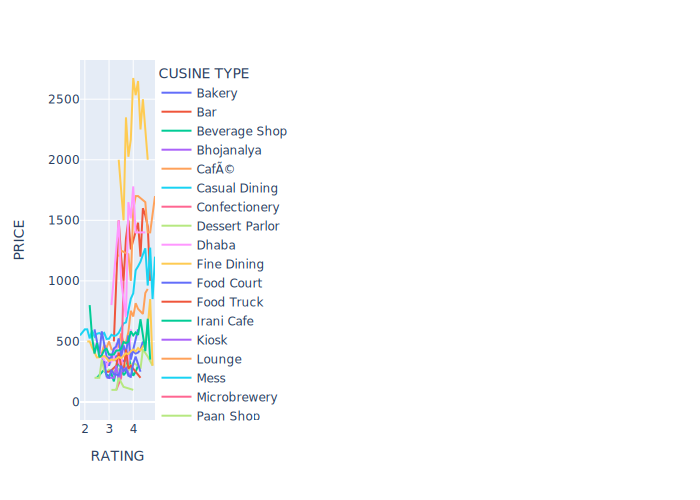

In [91]:
fig = px.line(price_rating, y="PRICE", x="RATING",color='CUSINE TYPE')
fig.show()

In [ ]:
Q9) Is there a relation between Region and Price?

In [92]:
region_price = zomato_mumbai.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price

,REGION,PRICE
0,Andheri,1250.000000
1,Andheri,590.049383
2,Bandra,1675.000000
3,Bandra,718.273381
4,Bhayandar,150.000000
...,...,...
132,Vikhroli,480.434783
133,Vile Parle,464.457831
134,Virar,452.027027
135,Wadala,427.500000


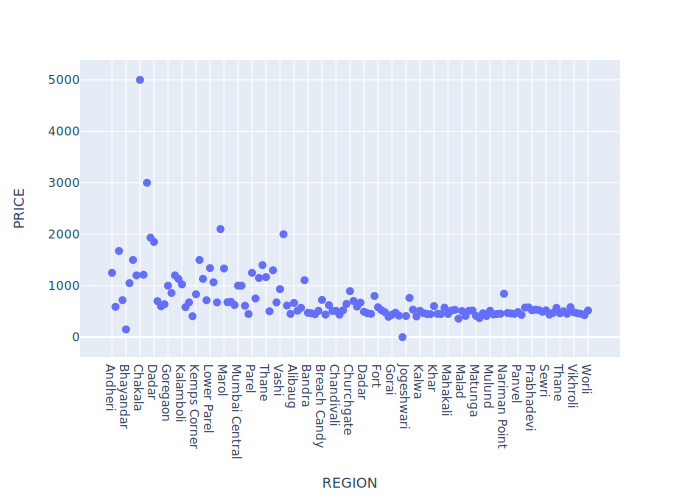

In [93]:
fig = px.scatter(region_price, x="REGION", y="PRICE").update_traces(marker_size=8)
fig.show()

In [ ]:
Q10) Find the list of Affordable Restaurants?

In [94]:
max_price = zomato_mumbai['PRICE'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [95]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest = zomato_mumbai[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
aff_rest = aff_rest[aff_rest['PRICE'] <= 1250]
aff_rest.sort_values(by='PRICE', inplace=True)
aff_rest

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
1659,Texas - Italian,0,Sizzlers,Italian\tMexican,https://www.zomato.com/mumbai/texas-italian-me...
6137,Sanjog Wine N Dine,5,North Indian\tChinese,Thane,Casual Dining
9598,Ho5 Store,50,Fast Food,Matunga,none
2925,Jab We Eat,50,South Indian\tNorth Indian\tMaharashtrian\tFas...,Girgaum,none
1686,King Of Kulfi,100,Desserts\tIce Cream,Dadar,Dessert Parlor
...,...,...,...,...,...
14238,The Homemade Cafe,1200,Continental\tItalian,Andheri,CafÃ©
0,Hitchki,1200,Modern Indian\tNorth Indian\tChinese\tMomos\tB...,Bandra,Casual Dining
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250,Desserts,Parel,Dessert Parlor
964,Bijoli Grill,1250,Bengali,Powai,Casual Dining


In [96]:

# Finding the highest rated list of restaurants
highrate_rest = zomato_mumbai[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']]
highrate_rest = highrate_rest[highrate_rest['RATING'] >= 4.5]
highrate_rest.sort_values(by='PRICE', inplace=True)
highrate_rest

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
763,Curry And Combos Twist,200,North Indian\tChinese,Andheri,Quick Bites,4.5
807,Moussestruck,200,Desserts,Near Andheri Station,none,4.5
14234,Cone Culture,250,European,Kharghar,Casual Dining,4.6
725,Belo Pops,300,Ice Cream\tDesserts\tBeverages,Andheri,none,4.5
...,...,...,...,...,...,...
5335,Mia Cucina,2000,Italian,Bandra,Casual Dining,4.5
1786,Global Fusion,2000,Chinese\tJapanese\tAsian\tNorth Indian,Worli,Fine Dining,4.6
8887,Drifters Tap Station,2000,North Indian\tContinental\tEuropean\tAmerican,Bandra,Casual Dining,4.5
12625,House of Mandarin,2100,Chinese\tSushi\tAsian,Bandra,Casual Dining,4.5


In [97]:
highrate_aff = pd.merge(aff_rest, highrate_rest, how='inner', on=['NAME', 'REGION'])
highrate_aff = highrate_aff[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
highrate_aff.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)

In [98]:
# Affordable Restaurants with low price and high rating 
highrate_aff

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor
1,Moussestruck,200,Desserts,Near Andheri Station,none
2,Curry And Combos Twist,200,North Indian\tChinese,Andheri,Quick Bites
3,Cone Culture,250,European,Kharghar,Casual Dining
4,Smiley Pops,300,Desserts\tIce Cream\tBeverages\tSandwich,Andheri,Dessert Parlor
...,...,...,...,...,...
60,The Joker Bistro,1200,North Indian\tChinese\tContinental,CBD Belapur,Casual Dining
61,Invento,1200,Chinese\tFast Food\tNorth Indian\tItalian\tMex...,Lower Parel,Casual Dining
62,Culinary Tales,1200,Chinese\tEuropean\tContinental\tSalad\tItalian...,Andheri,Casual Dining
63,Wild Dining Restaurant,1200,North Indian\tContinental\tMexican\tChinese,Andheri,Casual Dining


In [ ]:
Q11) Find the list of most Reliable Restaurants?

In [99]:
mean_votes = zomato_mumbai['VOTES'].mean()
mean_votes

177.2656679624538

In [101]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest = zomato_mumbai[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'VOTES']]
mean_rest = mean_rest[mean_rest['VOTES'] > 177]
mean_rest.sort_values(by='VOTES', inplace=True)
mean_rest

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,VOTES
4194,Sai Sagar Veg Treat,500,North Indian\tSouth Indian\tChinese\tFast Food...,Kalyan,Casual Dining,178
884,Rajmanya- Seafood family restaurant,800,Maharashtrian\tKonkan\tSeafood,Vashi,Casual Dining,178
3914,Ice Cafe,500,Fast Food\tIce Cream\tBeverages\tPizza,Borivali,Quick Bites,178
7897,Konkan Lajjatdar,500,Seafood\tBiryani\tBeverages\tChinese\tMalwani\...,Andheri,Casual Dining,178
3828,Frozen Delight -The Dessert Cafe,250,Desserts\tIce Cream,Airoli,Dessert Parlor,178
...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,1600,American\tChinese\tMughlai\tItalian,Colaba,Casual Dining,7327
1251,Joey's Pizza,800,Pizza,Malad,Quick Bites,7350
5337,Chili's American Grill & Bar,1400,American\tMexican\tBurger\tTex-Mex,Powai,Casual Dining,7377
3751,Prithvi Cafe,700,Cafe\tFast Food,Juhu,CafÃ©,8000


In [104]:
reliable_rest = pd.merge(mean_rest, highrate_aff, how='inner', on=['NAME', 'REGION'])
reliable_rest = reliable_rest[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
reliable_rest.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)
reliable_rest

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Rajmanya- Seafood family restaurant,800,Maharashtrian\tKonkan\tSeafood,Vashi,Casual Dining
1,Fresh Food Co.,500,Continental\tHealthy Food\tSalad\tBeverages\tD...,Santacruz,none
2,Dessertino,300,Desserts\tIce Cream,Kandivali,Dessert Parlor
3,Invento,1200,Chinese\tFast Food\tNorth Indian\tItalian\tMex...,Lower Parel,Casual Dining
4,Maharashtra Lunch Home,600,Maharashtrian\tMalwani\tKonkan\tSeafood,Kharghar,Casual Dining
5,Regano's,600,Continental\tFast Food\tItalian\tDesserts,Malad,Casual Dining
6,Big Bang Cuurry,350,North Indian\tBiryani\tRolls,Andheri,none
7,Sandy's Den,1000,Fast Food\tBar Food,Chembur,Casual Dining
8,Angrezi Patiyalaa,1200,North Indian\tFinger Food\tAmerican\tMexican\t...,Andheri,Casual Dining
9,Maezo,1000,Modern Indian,Thane,Casual Dining
